In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

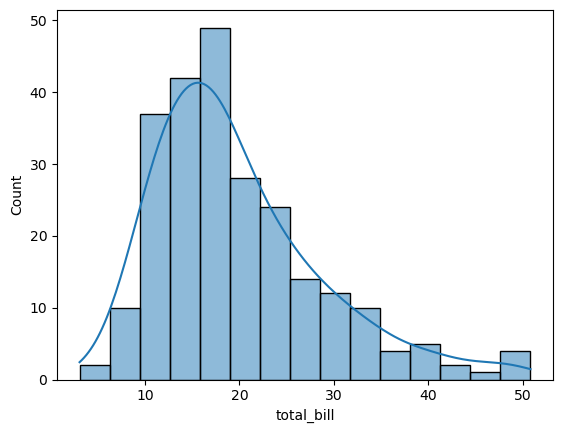

In [16]:
sns.histplot(tips['total_bill'], kde=True, bins=15)

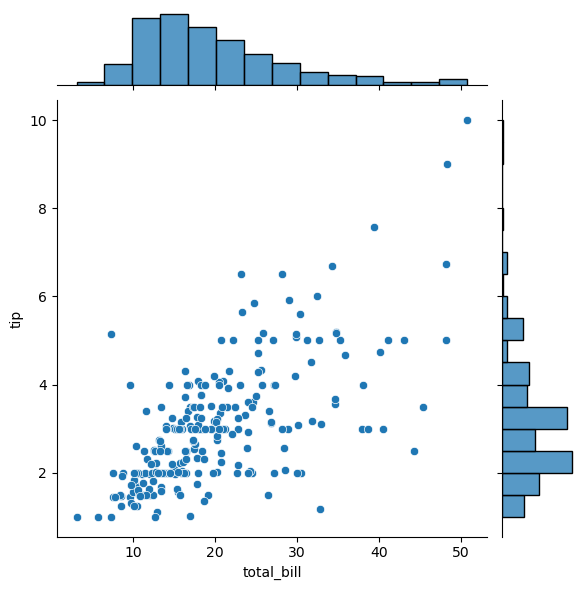

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='tip', ylabel='Count'>

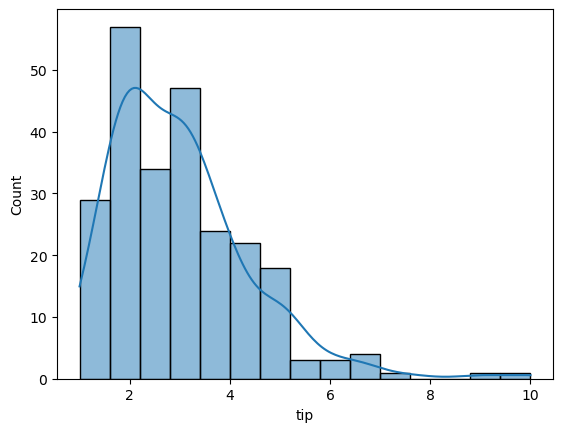

In [18]:
sns.histplot(tips['tip'], kde=True, bins=15)

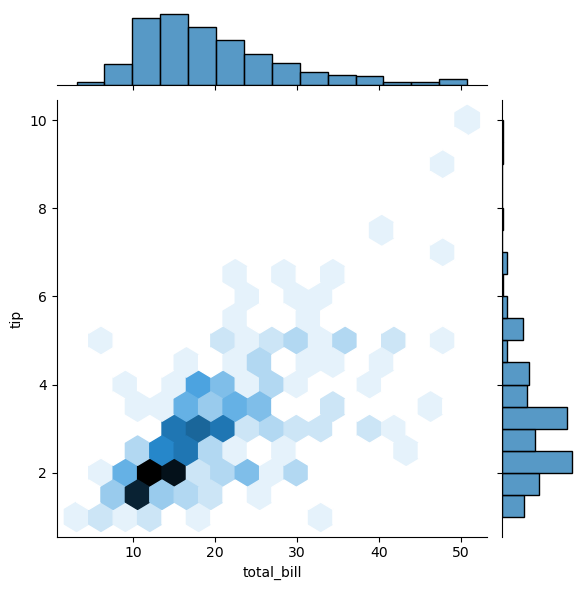

In [19]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

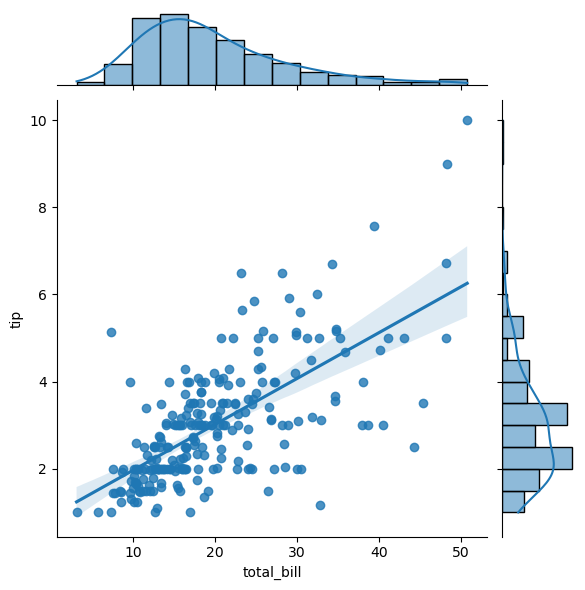

In [20]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

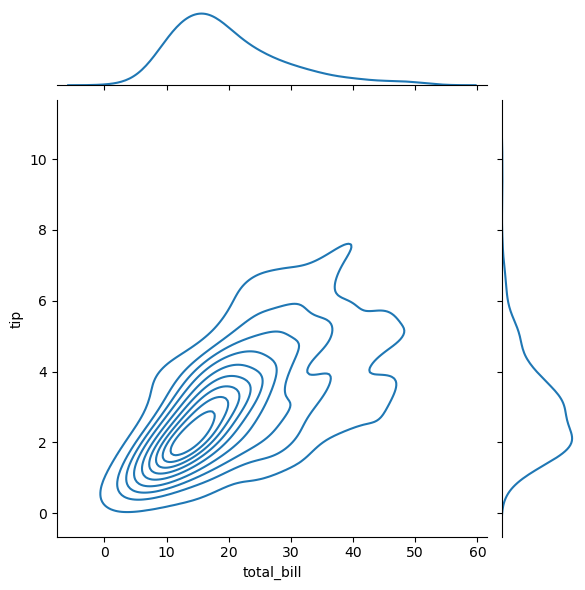

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

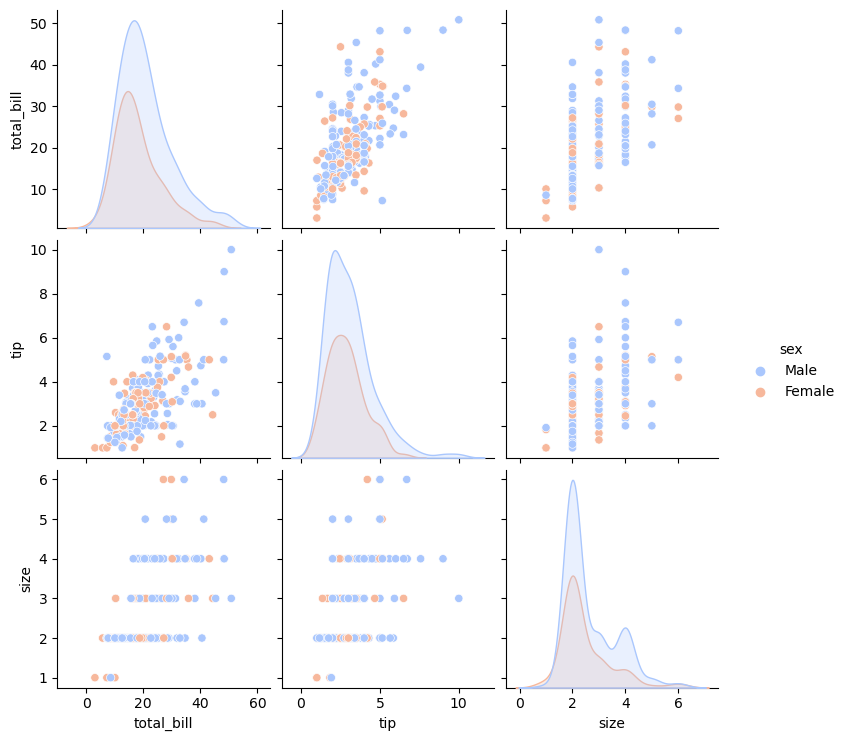

In [24]:
sns.pairplot(tips, hue='sex', palette="coolwarm")

<AxesSubplot:xlabel='total_bill'>

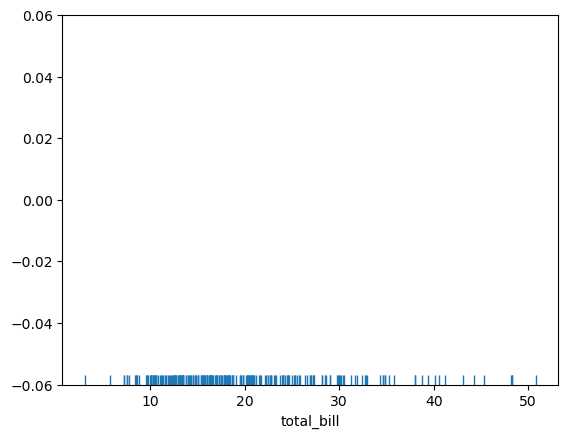

In [25]:
sns.rugplot(tips['total_bill'])

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

ValueError: If using all scalar values, you must pass an index

Text(0.5, 0.98, 'Sum of the Basis Functions')

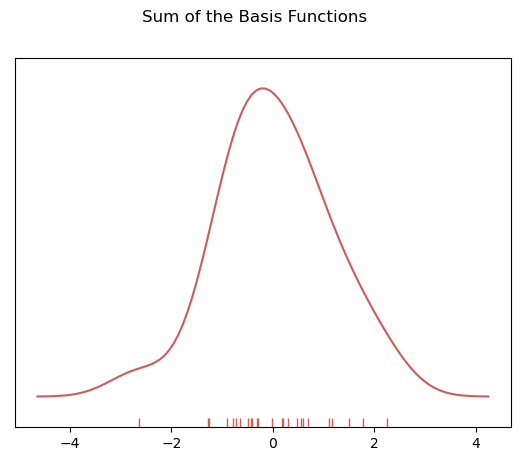

In [28]:

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

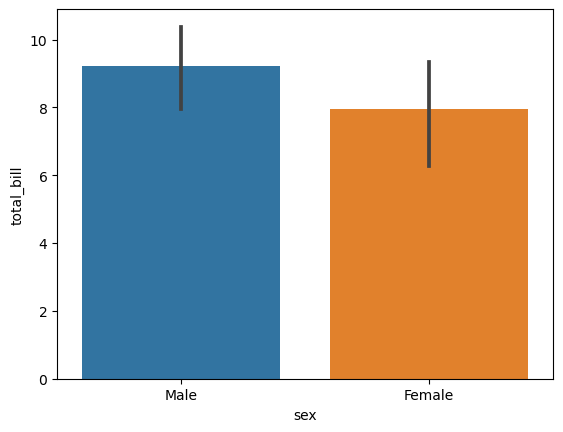

In [31]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

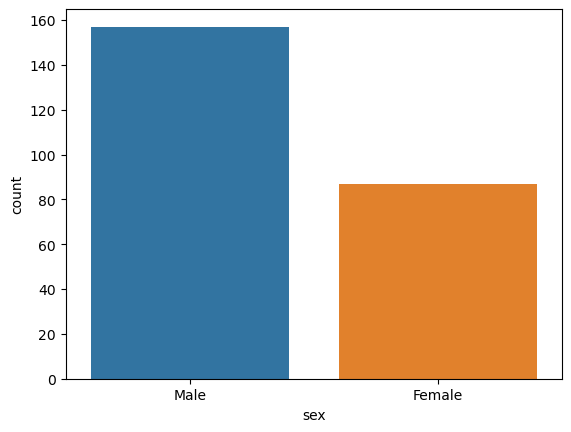

In [32]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

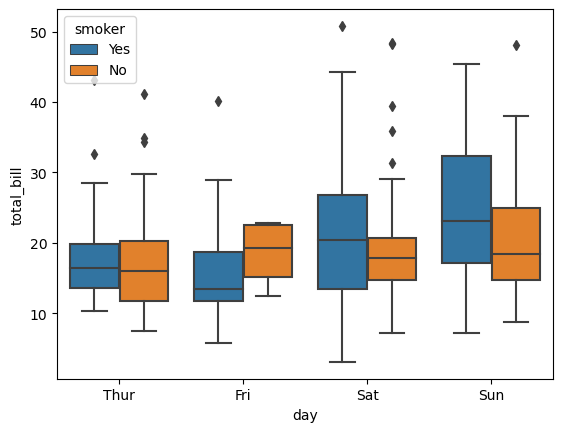

In [34]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

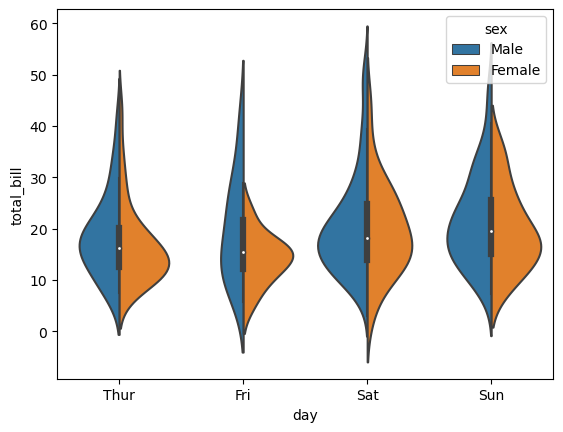

In [37]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

D:\Users\Partha.bora\Anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

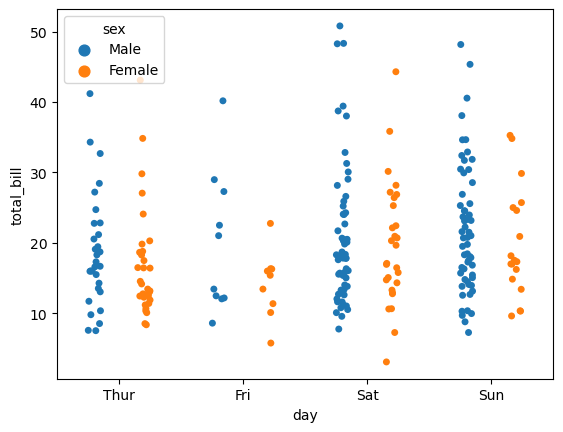

In [43]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

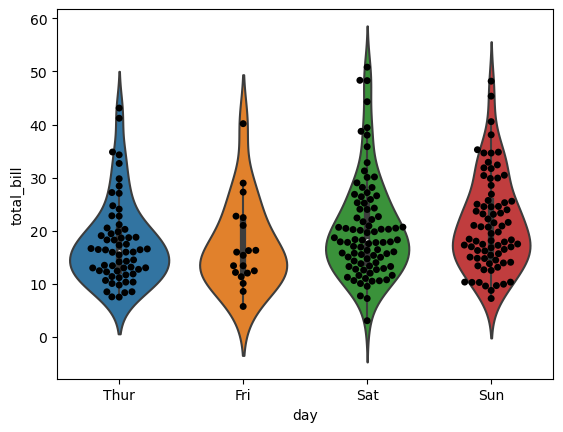

In [45]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

D:\Users\Partha.bora\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


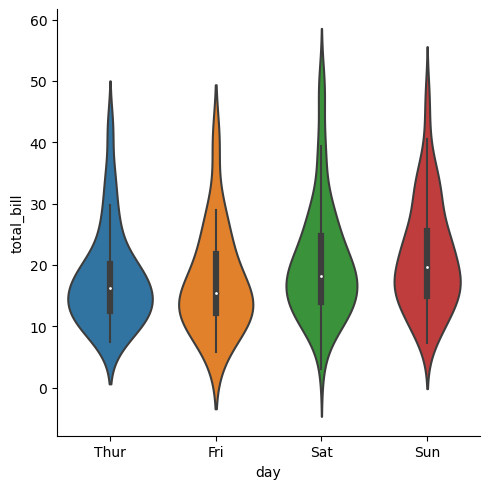

In [48]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='violin')

In [50]:
tc = tips.corr()

<AxesSubplot:>

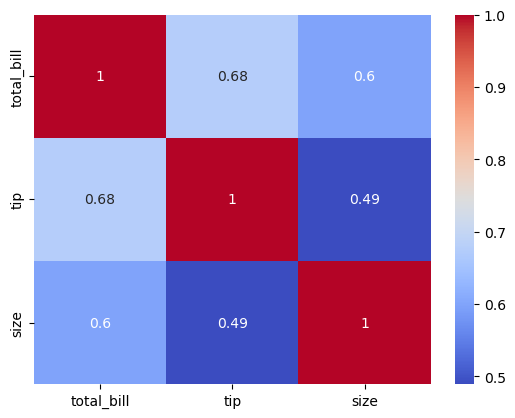

In [53]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [55]:
flights = sns.load_dataset('flights')

In [56]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [57]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [59]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

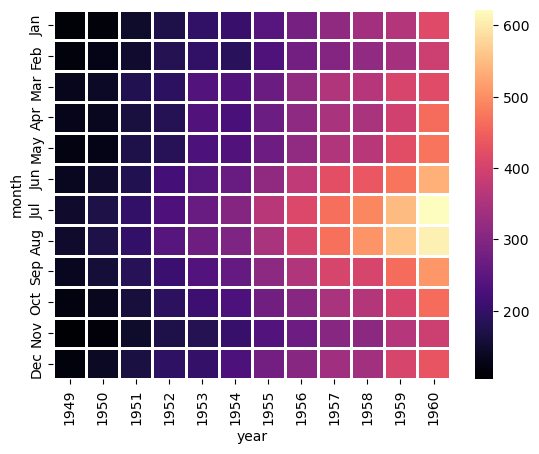

In [61]:
sns.heatmap(fp, cmap='magma', linewidths=1, linecolor='white')

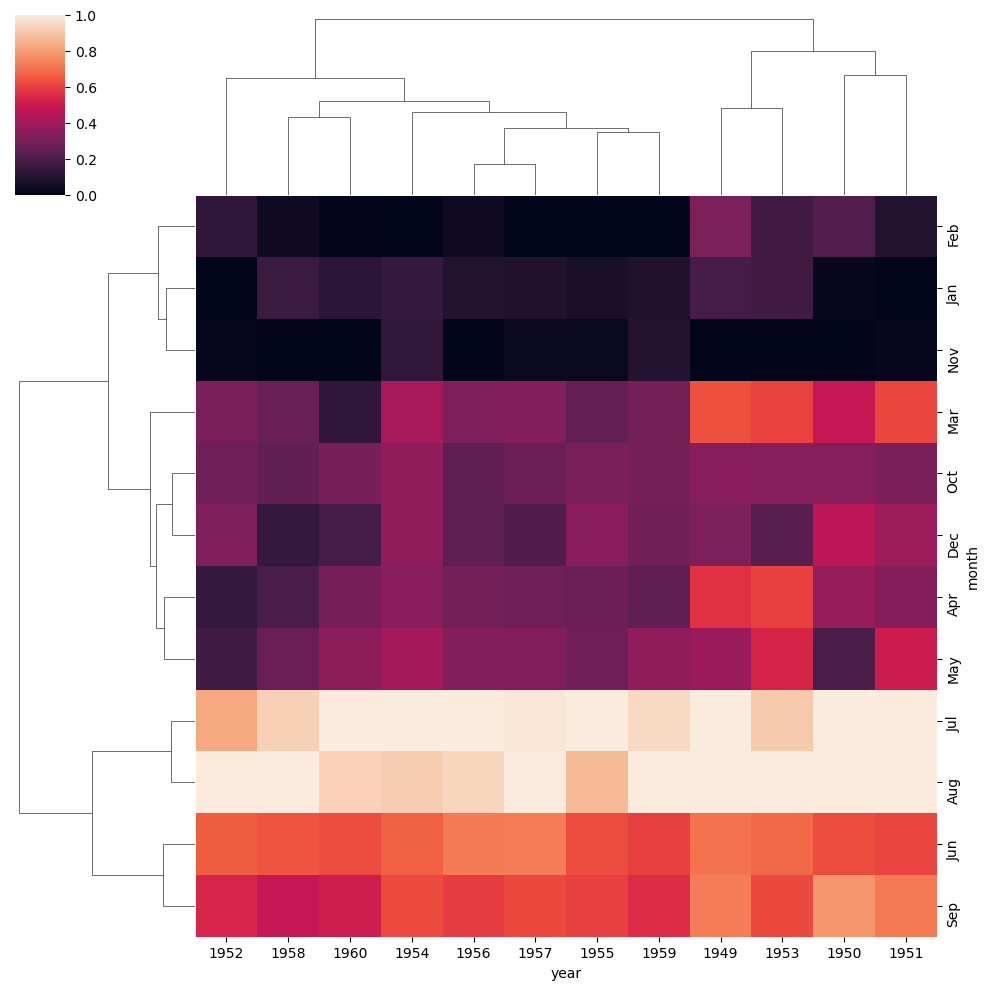

In [64]:
sns.clustermap(fp, standard_scale=1)

In [1]:
import chart_studio.plotly as py

In [66]:
pip install chart_studio

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs

In [5]:
init_notebook_mode(connected=True)

In [9]:
data = dict(type = 'choropleth',
           locations = ['AZ','CA', 'NY'],
           locationmode = 'USA-states',
           colorscale='Portland',
           text = ['Data 1', 'Data 2', 'Data 3'],
           z = [1.0,2.0,3.0],
           colorbar = {'title':'Colorbar Title Goes Here'})

In [10]:
layout = dict(geo = {'scope':'usa'})

In [15]:
choromap = go.Figure(data = [data], layout = layout)

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import chart_studio.plotly as py',
  'from plotly.offline',
  'from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs',
  'init_notebook_mode(connected=Ture)',
  'init_notebook_mode(connected=True)',
  "data = dict(type = 'choropleth'\n           locations = ['AZ','CA', 'NY']\n           locationmode = 'USA-states'\n           colorscale='Portland'\n           text = ['Data 1', 'Data 2', 'Data 3']\n           z = [1.0,2.0,3.0],\n           colorbar = {'title':'Colorbar Title Goes Here'})",
  "data = dict(type = 'choropleth',\n           locations = ['AZ','CA', 'NY']\n           locationmode = 'USA-states'\n           colorscale='Portland'\n           text = ['Data 1', 'Data 2', 'Data 3']\

In [13]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import chart_studio.plotly as py',
  'from plotly.offline',
  'from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs',
  'init_notebook_mode(connected=Ture)',
  'init_notebook_mode(connected=True)',
  "data = dict(type = 'choropleth'\n           locations = ['AZ','CA', 'NY']\n           locationmode = 'USA-states'\n           colorscale='Portland'\n           text = ['Data 1', 'Data 2', 'Data 3']\n           z = [1.0,2.0,3.0],\n           colorbar = {'title':'Colorbar Title Goes Here'})",
  "data = dict(type = 'choropleth',\n           locations = ['AZ','CA', 'NY']\n           locationmode = 'USA-states'\n           colorscale='Portland'\n           text = ['Data 1', 'Data 2', 'Data 3']\

In [16]:
import plotly.graph_objects as go

In [17]:
iplot(choromap)

In [18]:
plot(choromap)

'temp-plot.html'